In [52]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

(-100.0, 100.0)

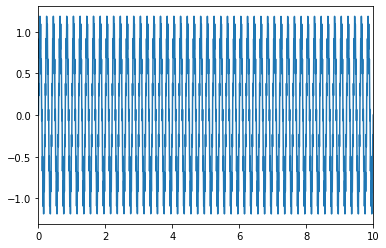

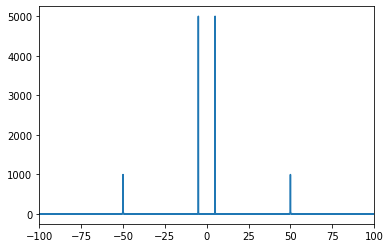

In [53]:
samplingFreq = 1000
tlims = [0,10]
signalFreq = [5,50]
signalMag = [1,0.2]
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)

yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t),d= 1.0/samplingFreq)
plt.figure()
plt.plot(t,y)
plt.xlim([min(t),max(t)])

plt.figure()
plt.plot(fcycles,np.absolute(yhat))
plt.xlim([-100,100])

In [54]:
def Kalman_Gain(Error_Est,Error_Measure):
    return Error_Est/(Error_Est+Error_Measure)

In [55]:
def Est_current (KG,Mea,Est_before):
    return Est_before + KG*(Mea-Est_before)

In [56]:
def Error_Est_current(KG,Error_Est_before):
    return (1-KG)*(Error_Est_before)

In [57]:
samplingFreq = 1000
tlims = [0,1]
signalFreq = [5,50]
signalMag = [1,0.2]
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)
true = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t)
Initial_EST = 0
Initial_Error = 0.2
Error_Meas = signalMag[0]

In [58]:
Estimate = Initial_EST
KG = 0 
Error_Est_before = Initial_Error
Err_Est_current = Initial_Error
estimates = []
for i in range(len(t)):
    Mea = y[i]
    KG = Kalman_Gain(Err_Est_current, Error_Meas)
    Estimate = Est_current(KG, Mea, Estimate)
    Err_Est_current = Error_Est_current(KG, Error_Est_before)
    Error_Est_before = Err_Est_current
    estimates.append(Estimate)

(-100.0, 100.0)

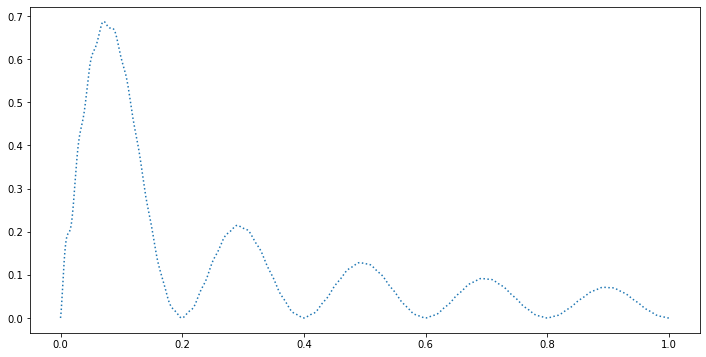

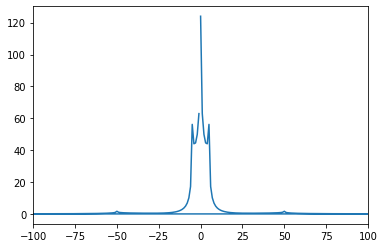

In [59]:
estimates = np.array(estimates)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, estimates, label='Kalman Filter Estimate', linestyle='dotted')
yhat = np.fft.fft(estimates)
fcycles = np.fft.fftfreq(len(t),d= 1.0/samplingFreq)
plt.figure()
plt.plot(fcycles,np.absolute(yhat))
plt.xlim([-100,100])

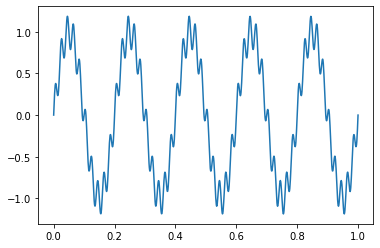

In [60]:
plt.plot(t, y, label='Measured Signal')

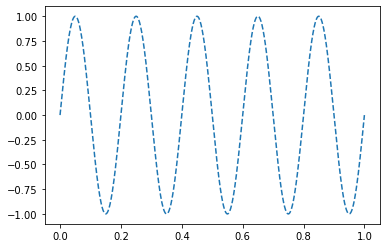

In [61]:
plt.plot(t, true, label='True Signal', linestyle='dashed')

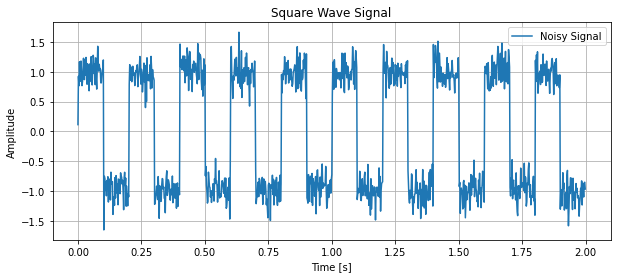

In [62]:
def generate_square_wave(frequency, amplitude, duration, sample_rate, noise_level):
    """
    Generate a square wave signal with adjustable noise.

    Parameters:
    - frequency: Frequency of the square wave in Hz
    - amplitude: Amplitude of the square wave
    - duration: Duration of the signal in seconds
    - sample_rate: Sample rate in samples per second
    - noise_level: Standard deviation of Gaussian noise to add to the signal

    Returns:
    - t: Array of time values
    - signal: Array of signal values
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = amplitude * np.sign(np.sin(2 * np.pi * frequency * t))
    
    noise = np.random.normal(0, noise_level, signal.shape)
    noisy_signal = signal + noise
    
    return t, noisy_signal

def plot_signal(t, signal, title='Square Wave Signal'):
    """
    Plot a signal.

    Parameters:
    - t: Array of time values
    - signal: Array of signal values
    - title: Title of the plot
    """
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal, label='Noisy Signal')
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
frequency = 5  # Hz
amplitude = 1.0
duration = 2.0  # seconds
sample_rate = 500  # samples per second
noise_level = 0.2

t, noisy_signal = generate_square_wave(frequency, amplitude, duration, sample_rate, noise_level)
plot_signal(t, noisy_signal)


In [63]:
Initial_EST = 1
Initial_Error = 0.2
Error_Meas = 0.2
Estimate = Initial_EST
KG = 0 
Error_Est_before = Initial_Error
Err_Est_current = Initial_Error
estimates = []
Value_before = noisy_signal[0]

In [64]:
for i in range(len(t)):
    if (abs(noisy_signal[t] - Value_before) >= 1):
        estimates.append(noisy_signal[t])
    else:
        Mea = noisy_signal[i]
        KG = Kalman_Gain(Err_Est_current, Error_Meas)
        Estimate = Est_current(KG, Mea, Estimate)
        Err_Est_current = Error_Est_current(KG, Error_Est_before)
        Error_Est_before = Err_Est_current
        estimates.append(Estimate)
    Value_before = noisy_signal[t]

IndexError: arrays used as indices must be of integer (or boolean) type

(-100.0, 100.0)

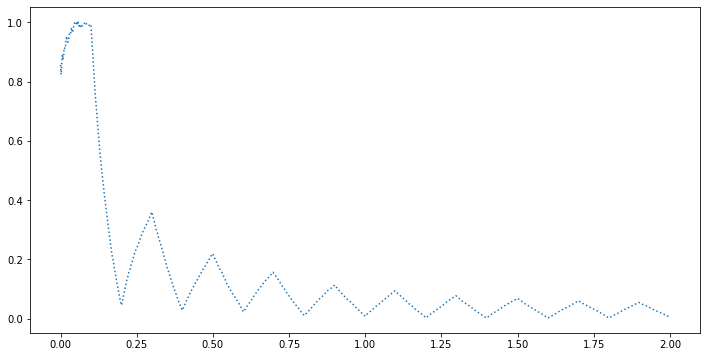

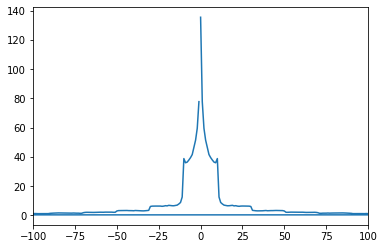

In [ ]:
estimates = np.array(estimates)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, estimates, label='Kalman Filter Estimate', linestyle='dotted')
yhat = np.fft.fft(estimates)
fcycles = np.fft.fftfreq(len(t),d= 1.0/samplingFreq)
plt.figure()
plt.plot(fcycles,np.absolute(yhat))
plt.xlim([-100,100])